Image Path: ../data/CULane/driver_23_30frame/05151649_0422.MP4/00000.jpg
Label Path: ../data/CULane/laneseg_label_w16/driver_23_30frame/05151649_0422.MP4/00000.png


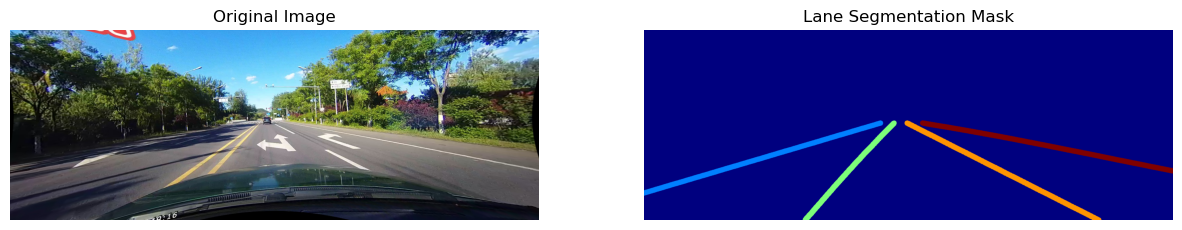


Label Mask Shape: (590, 1640)
Unique pixel values in mask: [0 1 2 3 4]


In [2]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration ---
# Define the root path for the CULane dataset
DATA_ROOT = '../data/CULane'

# Let's find an example image and its corresponding label to display.
# The 'list' directory contains text files that map images to their labels.
# We'll use the training list for this example.
train_list_path = os.path.join(DATA_ROOT, 'list/train_gt.txt')

# Read the first line of the training list to get a sample file path
with open(train_list_path, 'r') as f:
    first_line = f.readline().strip()

# The line contains paths to the image, the segmentation label, and existence flags
# Example format: /driver_23_30frame/05171042_0525.MP4/00000.jpg /laneseg_label_w16/driver_23_30frame/05171042_0525.MP4/00000.png 1 1 1 1
img_rel_path, label_rel_path, _, _, _, _ = first_line.split()

# Construct the full paths
image_path = os.path.join(DATA_ROOT, img_rel_path.lstrip('/'))
label_path = os.path.join(DATA_ROOT, label_rel_path.lstrip('/'))

print(f"Image Path: {image_path}")
print(f"Label Path: {label_path}")


# --- Load and Display ---
# Load the image using OpenCV (OpenCV loads in BGR format)
image_bgr = cv2.imread(image_path)
# Convert from BGR to RGB for correct color display in matplotlib
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Load the label mask (it's a single-channel grayscale image)
label_mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

# --- Visualize the data ---
# Create a figure to display the images
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off') # Hide axes

# Display the lane segmentation mask
ax[1].imshow(label_mask, cmap='jet') # Using 'jet' colormap to see different lane IDs
ax[1].set_title('Lane Segmentation Mask')
ax[1].axis('off') # Hide axes

plt.show()

# Print some info about the label mask
if label_mask is not None:
    print(f"\nLabel Mask Shape: {label_mask.shape}")
    print(f"Unique pixel values in mask: {np.unique(label_mask)}")